# Linear Regression

## Part 1 - Data Preprocessing

### Importing the dataset

In [436]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [437]:
data = pd.read_csv("hour.csv")

In [438]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [439]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [440]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Check Duplicated

In [441]:
data.duplicated().sum()

np.int64(0)

In [442]:
data.apply(lambda x: len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

### Check Null Values

In [443]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Feature engineering

In [444]:
data = data.drop(data.columns[[0,1,3]],axis = 1)

In [445]:
data.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Data Analysis

In [446]:
categorical_features = ['season','mnth','hr','holiday','weekday','workingday','weathersit']

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

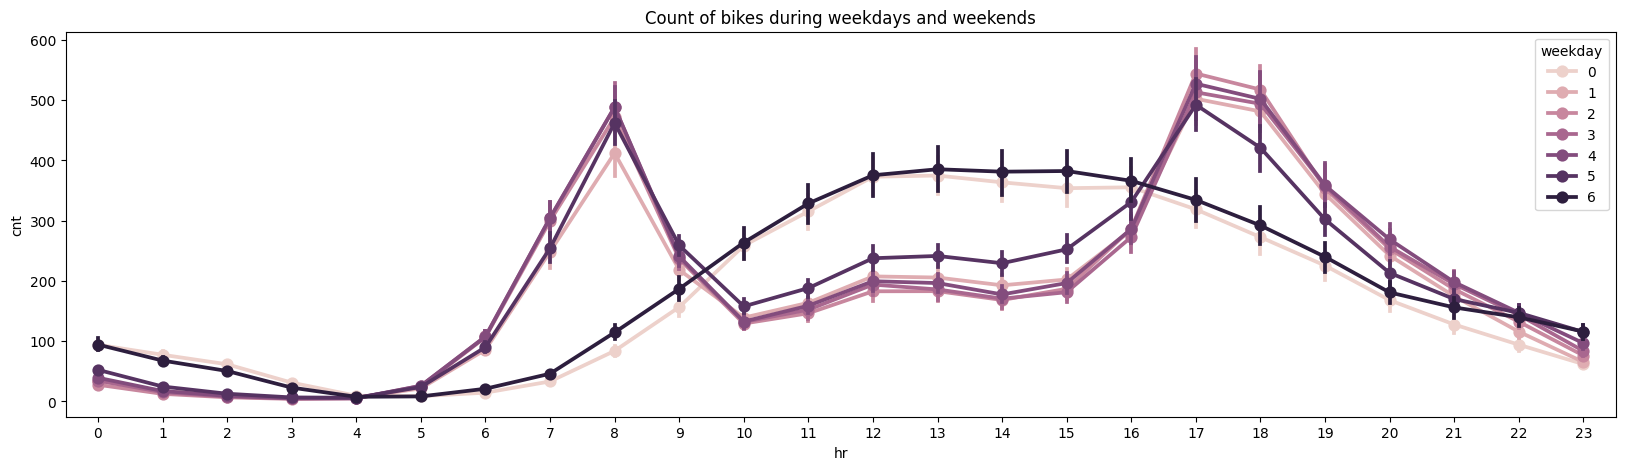

In [447]:
fig,ax = plt.subplots(figsize = (20,5))
sns.pointplot(data=data,x='hr',y='cnt',hue='weekday',ax=ax)
ax.set(title="Count of bikes during weekdays and weekends")

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Unregistered users')]

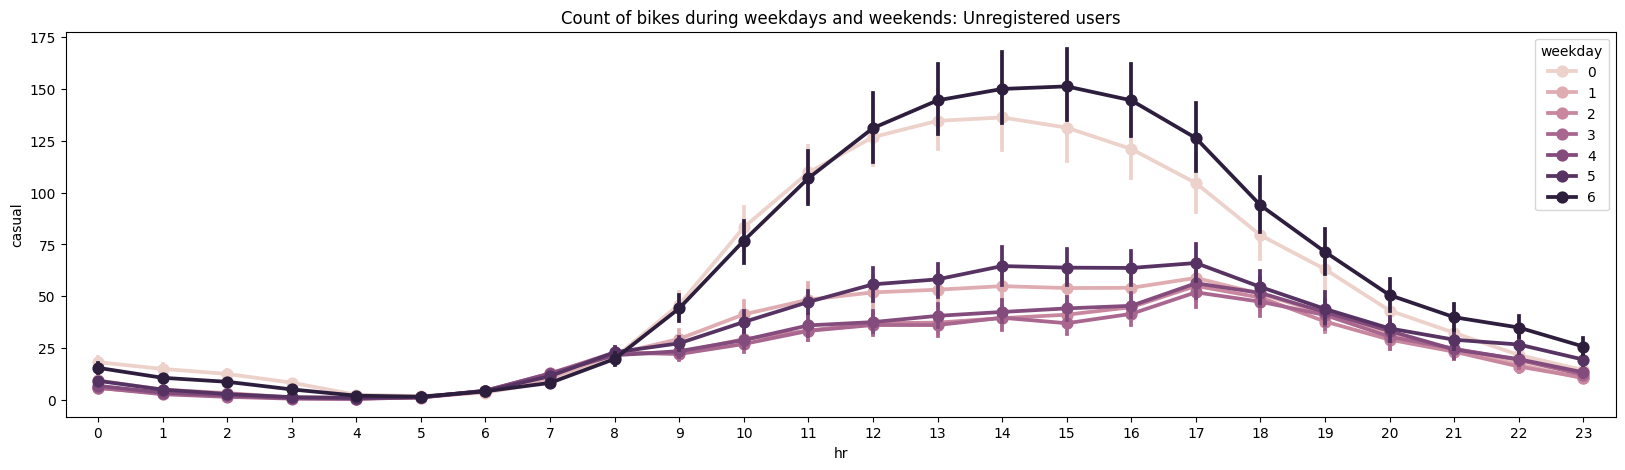

In [448]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=data,x='hr',y='casual',hue='weekday',ax=ax)
ax.set(title="Count of bikes during weekdays and weekends: Unregistered users")

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Registered users')]

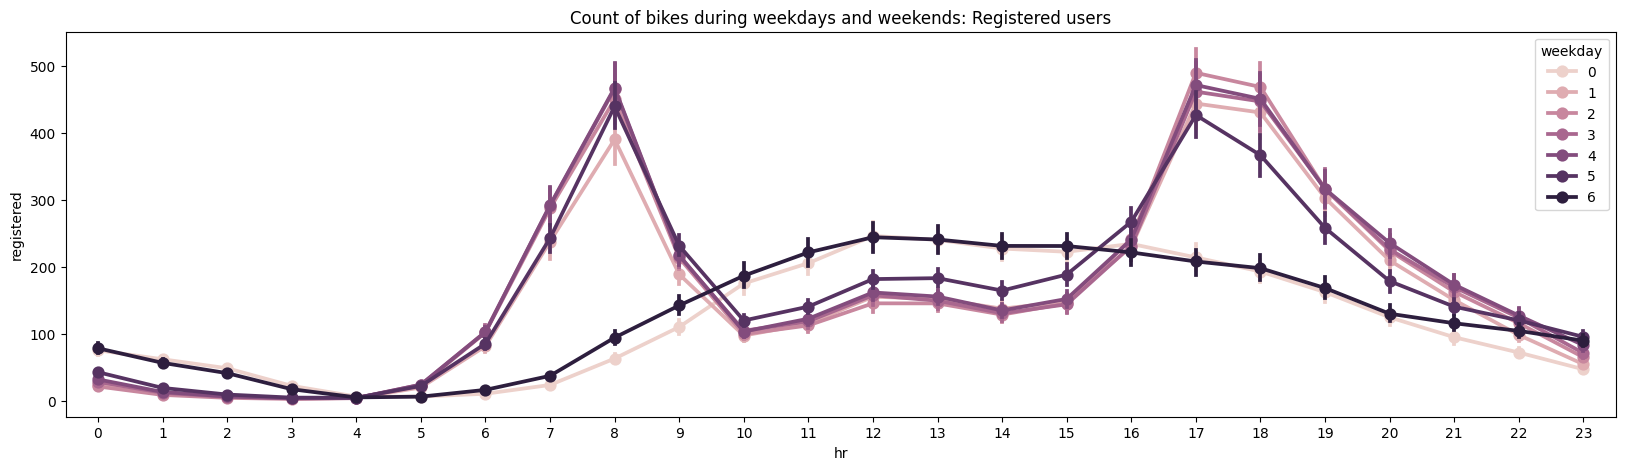

In [449]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=data,x='hr',y='registered',hue='weekday',ax=ax)
ax.set(title="Count of bikes during weekdays and weekends: Registered users")

[Text(0.5, 1.0, 'Count of bikes during different weathers')]

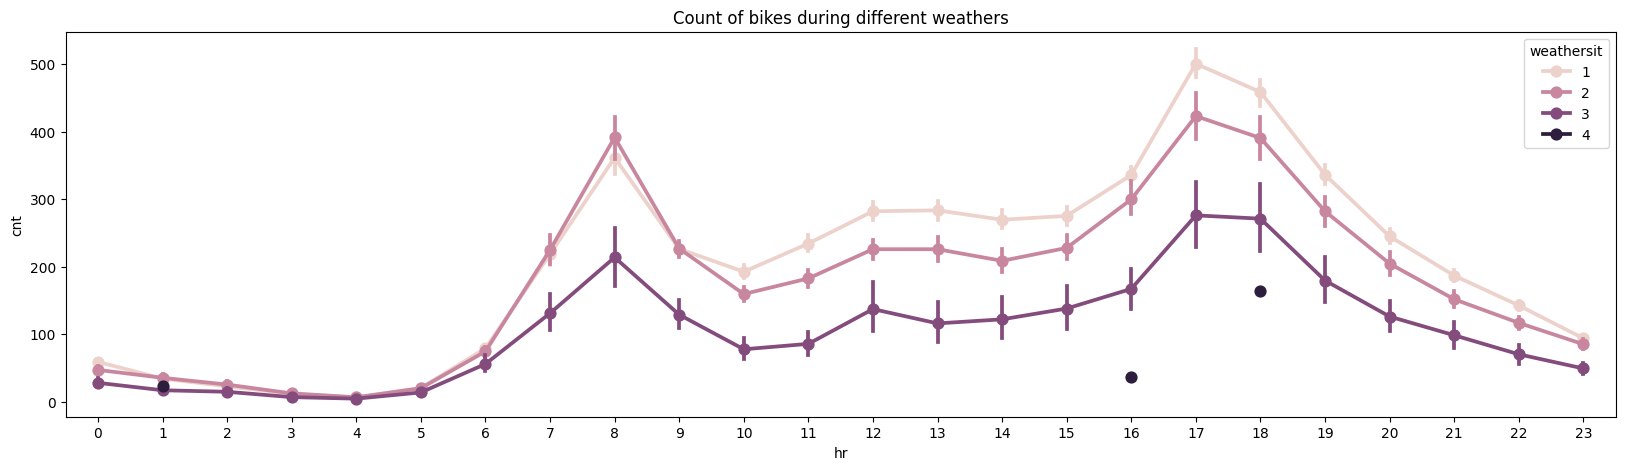

In [450]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=data,x='hr',y='cnt',hue='weathersit',ax=ax)
ax.set(title="Count of bikes during different weathers")

[Text(0.5, 1.0, 'Count of bikes during different seasons')]

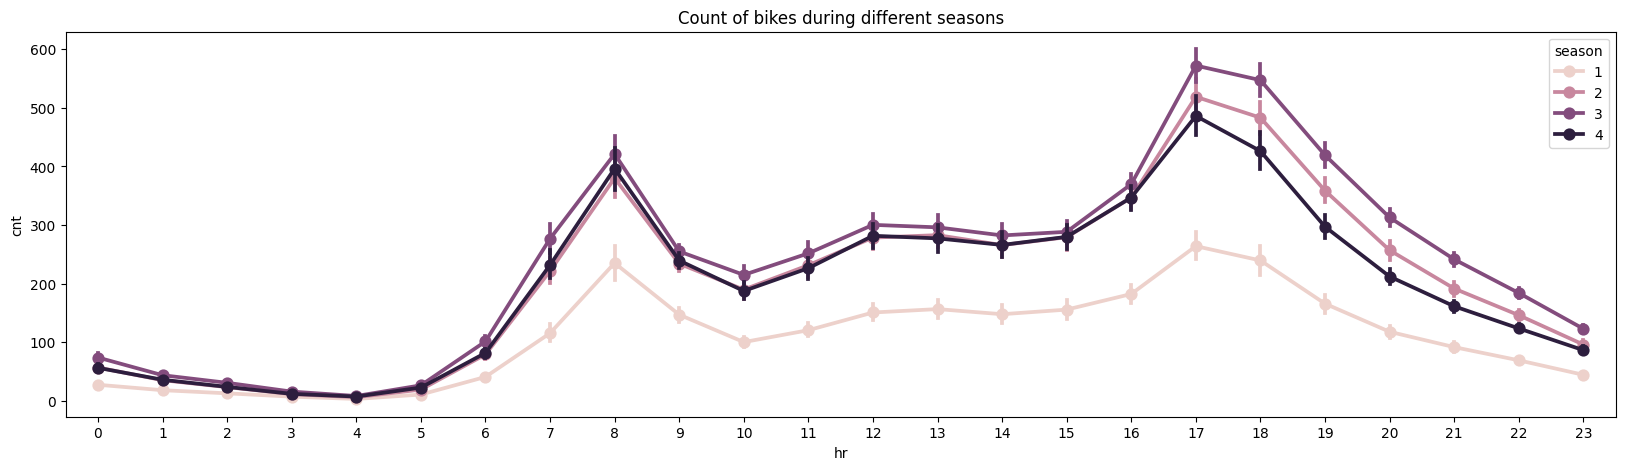

In [451]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=data,x='hr',y='cnt',hue='season',ax=ax)
ax.set(title="Count of bikes during different seasons")

[Text(0.5, 1.0, 'Count of bikes during different months')]

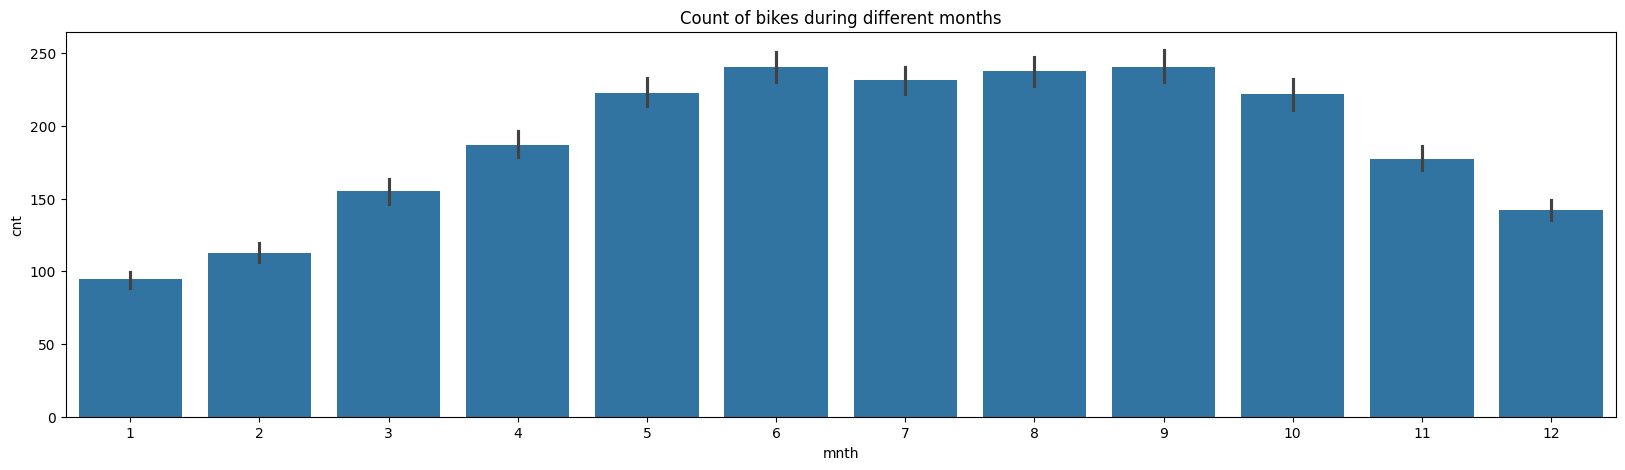

In [452]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=data,x='mnth',y='cnt',ax=ax)
ax.set(title="Count of bikes during different months")

[Text(0.5, 1.0, 'Count of bikes during different days')]

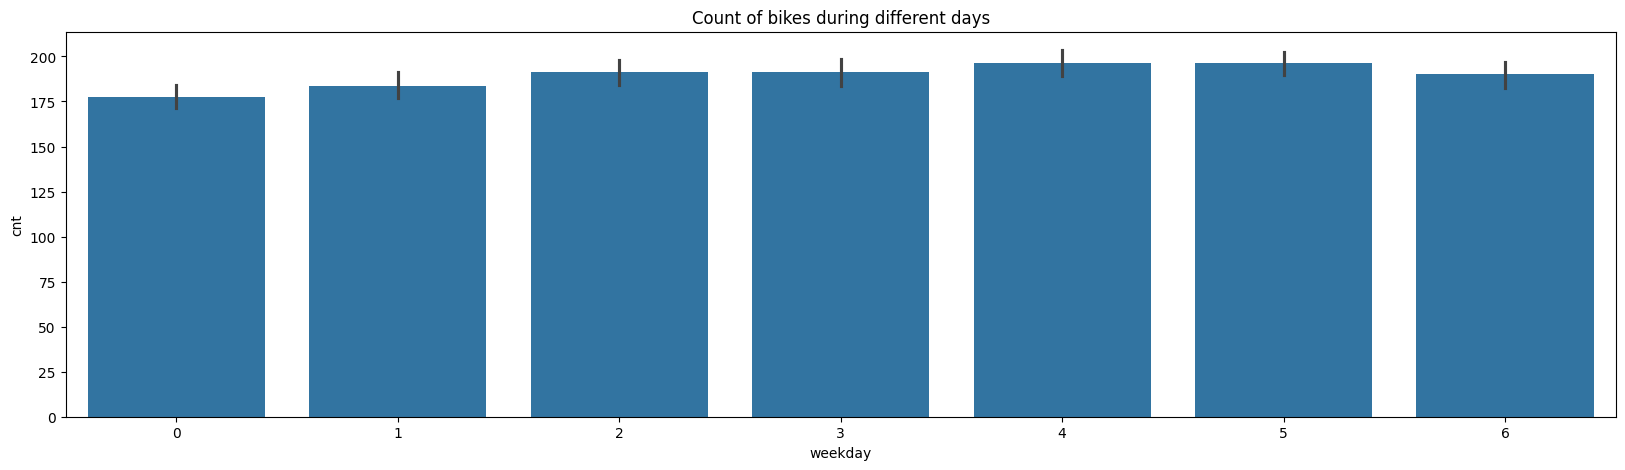

In [453]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=data,x='weekday',y='cnt',ax=ax)
ax.set(title="Count of bikes during different days")

<Axes: >

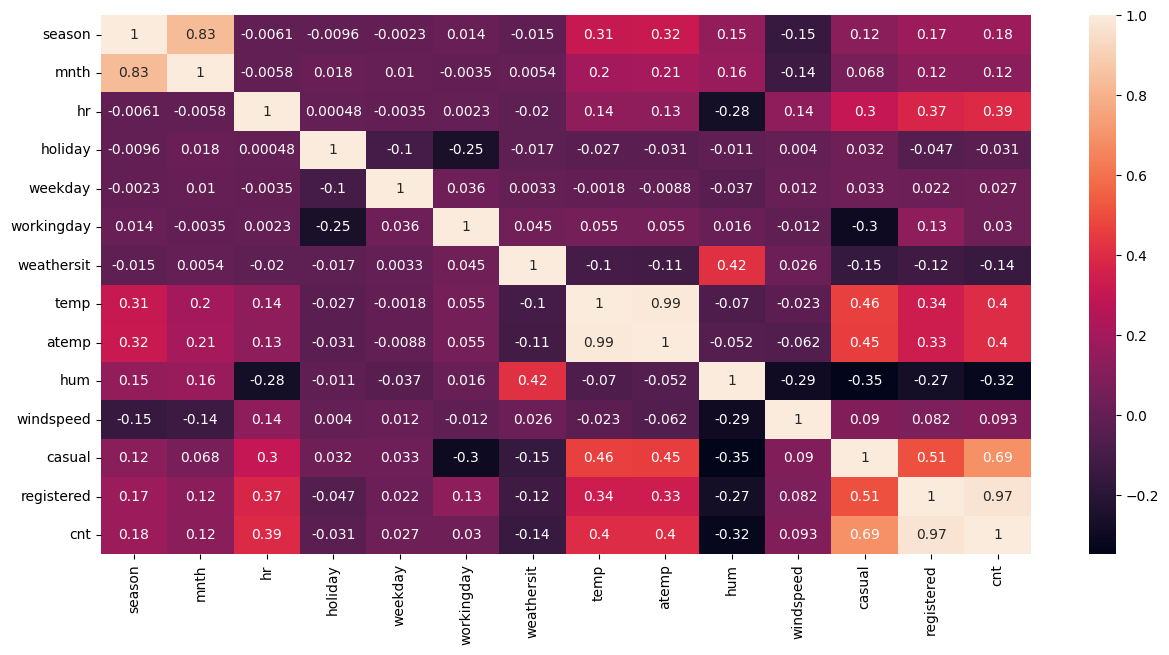

In [454]:
corr = data.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr,annot=True,annot_kws={'size':10})

## OneHotEncoding

In [455]:
categorical_cols = ['season','mnth','hr','holiday','weekday','workingday']
df = pd.get_dummies(data,columns=categorical_cols,drop_first=True)

In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 53 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weathersit    17379 non-null  int64  
 1   temp          17379 non-null  float64
 2   atemp         17379 non-null  float64
 3   hum           17379 non-null  float64
 4   windspeed     17379 non-null  float64
 5   casual        17379 non-null  int64  
 6   registered    17379 non-null  int64  
 7   cnt           17379 non-null  int64  
 8   season_2      17379 non-null  bool   
 9   season_3      17379 non-null  bool   
 10  season_4      17379 non-null  bool   
 11  mnth_2        17379 non-null  bool   
 12  mnth_3        17379 non-null  bool   
 13  mnth_4        17379 non-null  bool   
 14  mnth_5        17379 non-null  bool   
 15  mnth_6        17379 non-null  bool   
 16  mnth_7        17379 non-null  bool   
 17  mnth_8        17379 non-null  bool   
 18  mnth_9        17379 non-nu

In [457]:
data.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Normalazation Data

In [458]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
imputer = sc.fit(df.iloc[:,1:5])
df.iloc[:,1:5] = imputer.transform(df.iloc[:,1:5])

In [459]:
df.head()

,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,...,hr_22,hr_23,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1
0,1,0.224490,0.2879,0.81,0.0,3,13,16,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,0.204082,0.2727,0.80,0.0,8,32,40,False,False,...,False,False,False,False,False,False,False,False,True,False
2,1,0.204082,0.2727,0.80,0.0,5,27,32,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1,0.224490,0.2879,0.75,0.0,3,10,13,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1,0.224490,0.2879,0.75,0.0,0,1,1,False,False,...,False,False,False,False,False,False,False,False,True,False


### Getting the inputs and output

In [460]:
y_data = df['cnt'].values
data = df.drop(df.columns[[5,6,7]],axis=1)

### Creating the Training Set and the Test Set

In [461]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y_data, test_size = 0.25, random_state = 2)

## Part 2 - Building and training the model

### Building the model

In [462]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### Training the model

In [463]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Inference

Making the predictions of the data points in the test set

In [464]:
y_pred = model.predict(X_test)

In [465]:
y_pred

array([ 53.71170119,  80.04790455, 104.78892171, ..., 100.40660774,
       151.35811472, 388.15905505], shape=(4345,))

In [466]:
M = len(y_pred)
error = np.sum(np.power(y_pred - y_test,2))*(1/M)

In [467]:
error

np.float64(12461.573385919699)

Making the prediction of a single data point with AT = 15, V = 40, AP = 1000, RH = 75

## Part 3: Evaluating the model

### intercept (c)

In [468]:
model.intercept_

np.float64(2.0787740452603316)

### coef(M)

In [469]:
model.coef_

array([ -21.01959002,  219.13340322,   83.98355364, -116.54405831,
        -48.27674114,   38.93198306,   27.69686335,   65.42955617,
         -0.64034624,    3.30411776,   -8.78821794,   -2.26609834,
        -24.235297  ,  -46.69023925,  -21.58829906,    9.69532146,
         -0.94834843,  -16.64697215,   -9.84673837,  -15.31913034,
        -24.45271119,  -32.83728899,  -35.63562469,  -17.27208291,
         39.17603474,  174.5668746 ,  309.51591301,  165.73660122,
        105.68228965,  130.15060792,  164.28327046,  157.81029776,
        140.62619674,  150.56096404,  211.9725461 ,  358.79632887,
        335.42130811,  223.74103545,  153.71992842,  102.92914919,
         68.26858761,   29.81794927,  -16.26247308,   -4.23640481,
         -1.92187092,   -1.38909656,   -2.06098576,    5.09534553,
         14.50000484,   11.74946056])

In [470]:
train_pred = model.predict(X_train)

In [471]:
train_pred

array([ -0.95281743, -59.30705329, 280.71094067, ..., 406.6462964 ,
        40.96102059,  34.57845486], shape=(13034,))

### R-Score

In [472]:
model.score(X_train,y_train)

0.6284628373374148

In [473]:
model.score(X_test,y_test)

0.6329537837646879

### R-Squared

In [474]:
from sklearn.metrics import r2_score
r2_test = r2_score(y_test,y_pred)
r2_train = r2_score(y_train,y_train)

In [475]:
r2_test

0.6329537837646879

In [476]:
r2_train

1.0

### Adjusted R-Squared

## PolynomialFeatures


In [477]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly,y_train)
X_test_poly = poly_features.fit_transform(X_test)

In [478]:
prediction_test = poly_model.predict(X_test_poly)
prediction_train = poly_model.predict(X_train_poly)

In [479]:
training_score = r2_score(prediction_train,y_train)
testing_score = r2_score(prediction_test,y_test)
print(training_score,testing_score)

0.8310974841131076 0.8070269829185708
